<a href="https://colab.research.google.com/github/amelliaaas/Covid19-ML/blob/main/Tugas7ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My Drive/COVID-19_Radiography_Dataset

/content/drive/My Drive/COVID-19_Radiography_Dataset


In [3]:
# # TULIS CODE ANDA DISINI
# data_dir = "/content/drive/My Drive/COVID-19_Radiography_Dataset"
# base_dir = "/content/drive/My Drive/COVID-19_Radiography_Dataset"

In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# path to images
path = '/content/drive/My Drive/COVID-19_Radiography_Dataset/'

# animal categories
categories = ['COVID', 'Normal', 'Viral Pneumonia']

In [56]:
ls

 COVID/                       Normal.metadata.xlsx
 COVID.metadata.xlsx          README.md.txt
 Lung_Opacity/               'Viral Pneumonia'/
 Lung_Opacity.metadata.xlsx  'Viral Pneumonia.metadata.xlsx'
 Normal/


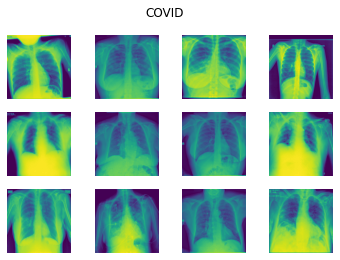

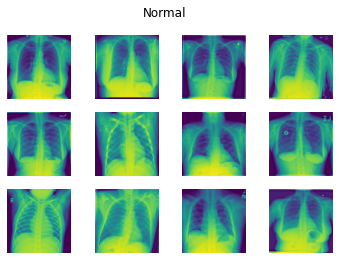

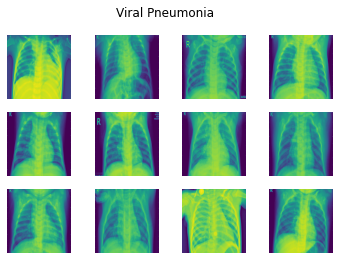

In [57]:
for category in categories:
    fig, _ = plt.subplots(3,4)
    fig.suptitle(category)
    for k, v in enumerate(os.listdir(path+category)[:12]):
        img = plt.imread(path+category+'/'+v)
        plt.subplot(3, 4, k+1)
        plt.axis('off')
        plt.imshow(img)
    plt.show()

In [58]:
shape0 = []
shape1 = []

for category in categories:
    for files in os.listdir(path+category):
        shape0.append(plt.imread(path+category+'/'+ files).shape[0])
        shape1.append(plt.imread(path+category+'/'+ files).shape[1])
    print(category, ' => height min : ', min(shape0), 'width min : ', min(shape1))
    print(category, ' => height max : ', max(shape0), 'width max : ', max(shape1))
    shape0 = []
    shape1 = []

COVID  => height min :  299 width min :  299
COVID  => height max :  299 width max :  299
Normal  => height min :  299 width min :  299
Normal  => height max :  299 width max :  299
Viral Pneumonia  => height min :  299 width min :  299
Viral Pneumonia  => height max :  299 width max :  299


In [59]:
# initialize the data and labels
data = []
labels = []
imagePaths = []
HEIGHT = 32
WIDTH = 55
N_CHANNELS = 3

# grab the image paths and randomly shuffle them
for k, category in enumerate(categories):
    for f in os.listdir(path+category):
        imagePaths.append([path+category+'/'+f, k])
        
import random
random.shuffle(imagePaths)
print(imagePaths[:10])

# loop over the input images
for imagePath in imagePaths:
    # load the image, resize the image to be HEIGHT * WIDTH pixels (ignoring
    # aspect ratio) and store the image in the data list
    image = cv2.imread(imagePath[0])
    image = cv2.resize(image, (WIDTH, HEIGHT))  # .flatten()
    data.append(image)
    
    # extract the class label from the image path and update the
    # labels list
    label = imagePath[1]
    labels.append(label)

[['/content/drive/My Drive/COVID-19_Radiography_Dataset/COVID/COVID-2757.png', 0], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/Normal/Normal-3645.png', 1], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1315.png', 2], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/COVID/COVID-1222.png', 0], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/Normal/Normal-8972.png', 1], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/Normal/Normal-2216.png', 1], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/Normal/Normal-9506.png', 1], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/Normal/Normal-3882.png', 1], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-137.png', 2], ['/content/drive/My Drive/COVID-19_Radiography_Dataset/Normal/Normal-9519.png', 1]]


In [60]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

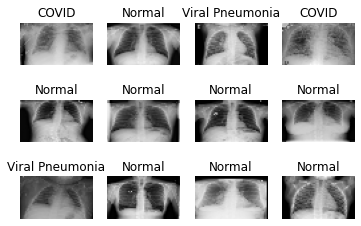

In [61]:
# Let's check everything is ok
plt.subplots(3,4)
for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(data[i])
    plt.axis('off')
    plt.title(categories[labels[i]])
plt.show()

In [68]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [69]:
# Preprocess class labels
trainY = np_utils.to_categorical(trainY, 3)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(12122, 32, 55, 3)
(3031, 32, 55, 3)
(12122, 3)
(3031,)


In [70]:
model = Sequential()

model.add(Convolution2D(64, (2, 2), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 31, 54, 64)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 27, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 26, 64)        16448     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 13, 64)        0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 7, 13, 64)         0         
                                                                 
 flatten_7 (Flatten)         (None, 5824)             

In [71]:
#aku nambahin validation data biar epoch nya ga training aja 

model.fit(trainX, trainY, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
379/379 [==============================] - 40s 103ms/step - loss: 0.4989 - accuracy: 0.7868
Epoch 2/20
379/379 [==============================] - 40s 104ms/step - loss: 0.3510 - accuracy: 0.8561
Epoch 3/20
379/379 [==============================] - 38s 101ms/step - loss: 0.2977 - accuracy: 0.8829
Epoch 4/20
379/379 [==============================] - 39s 104ms/step - loss: 0.2634 - accuracy: 0.8970
Epoch 5/20
379/379 [==============================] - 48s 127ms/step - loss: 0.2388 - accuracy: 0.9070
Epoch 6/20
379/379 [==============================] - 38s 101ms/step - loss: 0.2228 - accuracy: 0.9135
Epoch 7/20
379/379 [==============================] - 38s 101ms/step - loss: 0.2017 - accuracy: 0.9230
Epoch 8/20
379/379 [==============================] - 38s 101ms/step - loss: 0.1905 - accuracy: 0.9267
Epoch 9/20
379/379 [==============================] - 38s 99ms/step - loss: 0.1692 - accuracy: 0.9355
Epoch 10/20
379/379 [==============================] - 38s 99ms/step - los

In [72]:
model.save('model1.h5')

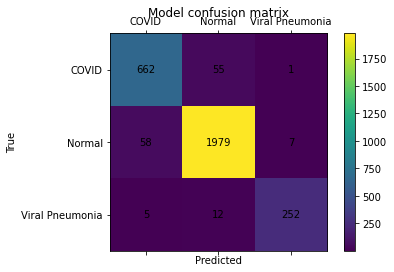

Accuracy : 95.45%


In [73]:
from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1) # return to label

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + categories)
ax.set_yticklabels([''] + categories)

for i in range(3):
    for j in range(3):
        ax.text(i, j, cm[j, i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy : %.2f%%" % (accuracy*100.0))